# Klasyfikacja tweetów Elona Muska

### Projekt realizuje grupa:

*  Wiktor Bajor **249459**
*  Adam Kubiak **249480**


### Opis wykonywanego zadania: 

&nbsp; W ramach projektu grupa będzie realizować zadanie klasyfikacji binarnej tweetów Elona Muska. Wykonywane zadanie będzie opierać się o zebranie tweetów sławnych ludzi, takich jak politycy, przedsiębiorcy, sportowcy, celebryci, influencerzy oraz Elon Musk. 
Akwizycja danych będzie realizowana poprzez publiczny interfejs programowania aplikacji (API), udostępniony przez Twitter.  Przy czym możliwa ilość tweetów do pobrania to pięćset tysięcy, co powinno być wystarczającą ilością danych. Dzięki udostępnionemu API można uzyskać dostęp do takich danych jak, treść publikacji, godzina publikacji, lokalizacja, ilość polubień czy ilość retweetów. Po ukończeniu etapu akwizycji danych kolejnym zadaniem, będzie przeanalizowanie tweetów, mając na uwadze takie elementy jak ilość retweetów, ilość polubień, występowanie pewnych słów kluczowych czy też sentyment umieszczonego tekstu. Na podstawie dokonanej analizy zostaną wybrane najbardziej charakterystyczne cechy tweetów Elona Muska. Ostatnim elementem projektu będzie utworzenie i wytrenowanie (na bazie wcześniej wybranych najbardziej istotny cech) klasyfikatora, który będzie oceniał czy dany tweet był napisany przez Elona Muska czy też nie. Wykonana analiza oraz klasyfikator mogłyby zostać wykorzystane do stworzenia cyfrowego sobowtóra Elona Muska. 

### Eksploracyjna analiza danych

#### Pochodzenie danych

Dane pobierane są bezpośrednio z Twittera. Do akwizycji wykorzystane zostało API V2, udostępnione bezpośrednio przez Twitter oraz dedykowana biblioteka Tweepy, która umożliwiła wygodne pobieranie danych z wykorzystaniem języka Python3. 


Zdecydowano się na poddanie analizie kilka publicznych osób o zbliżonej ilości obserwatorów. Do wybrania odpowiednich kont wykorzystano stronę https://www.socialtracker.io/toplists/top-50-twitter-users-by-followers/, na której została zebrana lista 50 najbardziej popularnych kont. W trakcie wyboru kont starano się aby wybrane konta reprezentowały różne części społeczeństwa(politycy, celebryci, przedsiębiorcy, artyści oraz platformy medialne).

Finalnie wybrano:

* Elon Musk - `115,845,432` mln obserwujących
* Barack Obama - `133,313,544` mln obserwujących
* Justin Bieber - `113,794,646` mln obserwujących
* Cristiano Ronaldo - `104,817,226` mln obserwujących
* Narendra Modi - `84,408,428` mln obserwujących
* YouTube - `77,602,328` mln obserwujących
* Ellen DeGeneres - `77,074,929` mln obserwujących
* Twitter - `64,794,610` mln obserwujących
* CNN - `64,098,649` mln obserwujących
* Bill Gates - `61,072,366` mln obserwujących
* Joe Biden - `36,371,140` mln obserwujących


Skrypt realizujący akwizycje tweetów, zawarte jest w pliku `tweets_scraper.ipynb`  

### Opis zmiennych

Api Twittera umożliwia pobranie wielu danych w ramach projektu zdecydowano się na pobranie kolejnych danych:

* `created_at`(string w formacie daty) - jest to data zamieszczenia wpisu z dokładnością co do sekundy, tą informacje można wykorzystać do sprawdzenia aktywności użytkownika w trakcie doby
* `text`(string) - zawartość wpisu
* `source`(string) - źródło publikacji wiadomości, na przykład czy wpis był wykonany z aplikacji z iPhone czy ze strony internetowej
* `possibly sensitive`(bool) - zawiera informacje czy dany wpis zawiera treści wrażliwe
* `lang`(string) - język wpisu
* `sentiment`(float) - sentyment wpisu w skali od -1 do 1 wyliczony z treści wpisu z wykorzystaniem biblioteki `TextBlob`
* `retweet count`(int) - ilość 'podania dalej wpisu'
* `reply count`(int) - ilość odpowiedzi 
* `like count`(int) - ilość polubień wpisu
* `quote count`(int) - ilość cytowań wpisu
* `is Elon Musk`(bool) - identyfikuje czy dany jest wpis jest utworzony przez Elona Muska 


Powyżej została opisana podstawowa część danych. Dane w tabeli występują następująco.




In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

        
def get_data(path="user_data/basic*.csv"):
    all_files = glob.glob(path)
    df_from_each_file = (pd.read_csv(f) for f in all_files)
    return pd.concat(df_from_each_file, ignore_index=True)

data_frame = get_data()
data_frame["created at"] = pd.to_datetime(data_frame["created at"])
data_frame.head(5)

,is Elon Musk,created at,text,source,possibly sensitive,lang,sentiment,retweet count,reply count,like count,quote count
0,False,2022-09-07 01:14:34+00:00,NaN,Twitter Web App,False,zxx,0.0,20161,12246,128558,5670
1,False,2022-07-07 19:33:51+00:00,1 year of preparation 🔥 @FreeFire_NA #GarenaFr...,Twitter for iPhone,False,en,0.0,5088,3657,27770,841
2,False,2022-02-16 03:05:25+00:00,"Go for the Gold, Ladies!!!!!! Cannot wait to w...",Twitter for iPhone,False,en,1.0,5779,6141,60501,778
3,False,2021-12-30 22:33:21+00:00,The countdown begins…,Twitter for iPhone,False,en,0.0,6977,3279,39912,3414
4,False,2021-12-22 00:17:53+00:00,gummy nft @inbetweenersNFT,Twitter Web App,False,en,0.0,4823,4003,32755,836


### Opis zmiennych 

Poza podstawowymi informacjami Twitter umożliwia pobranie gotowych analiz tekstu. Utworzone analizy zawierają, do sześciu różnych analiz. Pięć pierwszych analiz zawiera informacje o dziedzinie wpisu oraz o istocie wpisu. Ostatnia, szósta analiza zawiera prawdopodobieństw trafności analizy, dziedzinę oraz istotę wpisu. Ostatnia analiza nie jest dostępna dla każdego wpisu.     

In [112]:
data_annotations_frame = get_data('user_data/annotations*.csv')
data_annotations_frame["created at"] = pd.to_datetime(data_frame["created at"])
data_annotations_frame.head(5)

,is Elon Musk,context annotations domain 0,context annotations entity 0,context annotations domain 1,context annotations entity 1,context annotations domain 2,context annotations entity 2,context annotations domain 3,context annotations entity 3,context annotations domain 4,context annotations entity 4,context annotations domain 5,context annotations entity 5,annotations,created at
0,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,NaN,2022-09-07 01:14:34+00:00
1,False,Business Taxonomy,Technology Business,Brand,Apple,Brand,Twitter,Unified Twitter Taxonomy,Apple,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,"[0.6128, 'Tweet', 'Other']",2022-07-07 19:33:51+00:00
2,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,"[0.6239, 'Tweet', 'Other']",2022-02-16 03:05:25+00:00
3,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.937, 'Twitter Circle', 'Other']",2021-12-30 22:33:21+00:00
4,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.8345, 'Twitter Circle', 'Other']",2021-12-22 00:17:53+00:00


### Badanie brakujących zmiennych 

Twitter udostępnia dane, które są kompletne, ciężko znaleźć jakieś braki. 
Jedynie często pojawiającym się brakiem, który się pojawia jest to brak analizy konteksty wypowiedzi.
Brak ten nie jest istotny z punkt widzenia całego zbiory, ponieważ całkowity brak analizy tekstu występuje tylko dla kilku próbek.
Próbki obarczone tym problemem mogą zostać wykluczone.   

In [116]:
data_annotations_frame = data_annotations_frame[(~data_annotations_frame['context annotations domain 0'].isna() & ~data_annotations_frame['annotations'].isna())]
data_annotations_frame.head(5)

,is Elon Musk,context annotations domain 0,context annotations entity 0,context annotations domain 1,context annotations entity 1,context annotations domain 2,context annotations entity 2,context annotations domain 3,context annotations entity 3,context annotations domain 4,context annotations entity 4,context annotations domain 5,context annotations entity 5,annotations,created at
1,False,Business Taxonomy,Technology Business,Brand,Apple,Brand,Twitter,Unified Twitter Taxonomy,Apple,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,"[0.6128, 'Tweet', 'Other']",2022-07-07 19:33:51+00:00
2,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,"[0.6239, 'Tweet', 'Other']",2022-02-16 03:05:25+00:00
3,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.937, 'Twitter Circle', 'Other']",2021-12-30 22:33:21+00:00
4,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.8345, 'Twitter Circle', 'Other']",2021-12-22 00:17:53+00:00
8,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,"[0.5757, 'Tweet', 'Other']",2021-12-13 17:33:30+00:00


### Analiza danych numerycznych 

In [72]:
numeric_columns = ["like count","retweet count", 'quote count', 'reply count', 'sentiment']
data_frame.groupby(by='is Elon Musk')[numeric_columns].mean()

,like count,retweet count,quote count,reply count,sentiment
is Elon Musk,,,,,
False,45514.020492,5369.442623,844.729650,1807.858677,0.163179
True,269519.377652,23034.874116,4276.217822,18107.452617,0.110288


In [73]:
data_frame.groupby(by='is Elon Musk')[numeric_columns].median()

,like count,retweet count,quote count,reply count,sentiment
is Elon Musk,,,,,
False,8506.0,1514.0,92.0,454.0,0.027758
True,150914.0,10264.0,1251.0,9290.0,0.000000


In [96]:
data_frame.groupby(by='is Elon Musk')['source'].value_counts()

is Elon Musk  source                  
False         Twitter Web App             1997
              Twitter for iPhone          1552
              Twitter Media Studio        1304
              SocialFlow                   805
              Sprout Social                648
              Sprinklr                     581
              Twitter Web Client           164
              swonkie                       12
              Twitter for Advertisers.       4
              TweetDeck                      3
              Twitter Ads                    2
              Instagram                      1
              Periscope                      1
              Twitter for  iPhone            1
              Twitter for Android            1
True          Twitter for iPhone           707
Name: source, dtype: int64

In [90]:
data_frame_elon = data_frame.loc[data_frame['is Elon Musk'] == True] 
data_frame_not_elon = data_frame.loc[data_frame['is Elon Musk'] == False] 

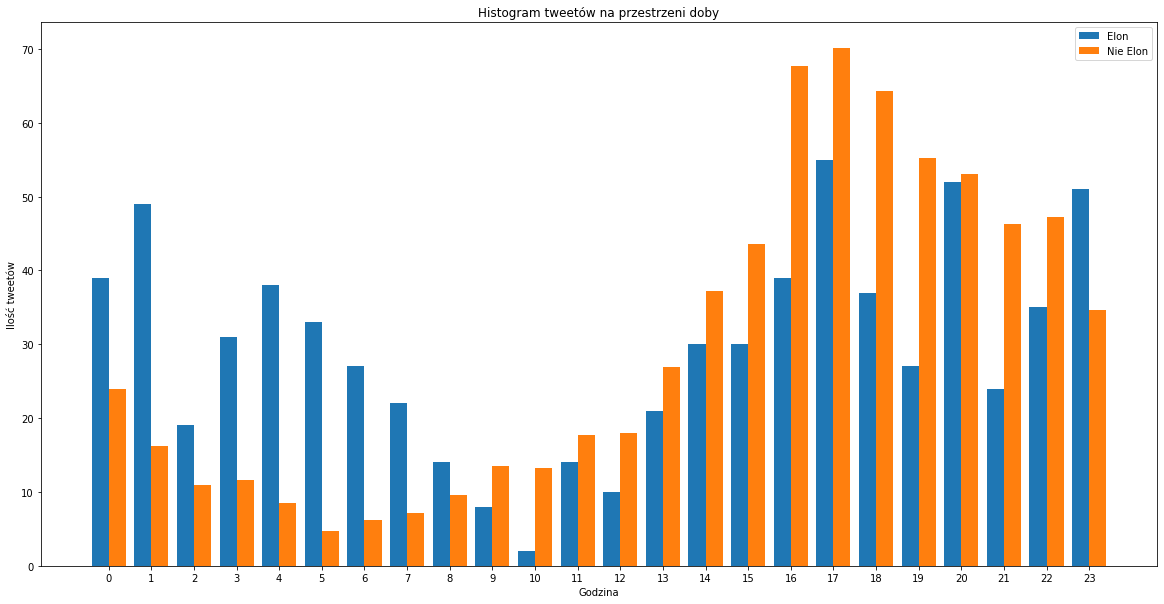

In [74]:
data_frame_not_elon_count_by_hour = data_frame_not_elon['created at'].groupby(data_frame_not_elon['created at'].dt.hour).count() / 10
elon_data_count_by_hour = data_frame_elon['created at'].groupby(data_frame_elon['created at'].dt.hour).count()

def fill_missing_hours_with_zero(data_count_by_hour_dict):
    for i in range(24):
        if i not in data_count_by_hour_dict:
            data_count_by_hour_dict[i] = 0
    
    data_count_by_hour_list = list(dict(sorted(data_count_by_hour_dict.items())).values())
    return np.array(data_count_by_hour_list).astype(float)

data_count_by_hour = fill_missing_hours_with_zero(data_frame_not_elon_count_by_hour.to_dict())

def plot_histogram_of_tweet_during_time(elon_data_count_by_hour, not_elon_data_count_by_hour, y_label, title):
    bar_width = 0.4
    hours = np.arange(24)
    plt.figure(figsize=(20, 10))
    plt.bar(hours - bar_width/2, elon_data_count_by_hour.values, width=bar_width, label='Elon')
    plt.bar(hours + bar_width/2, not_elon_data_count_by_hour, width=0.4, label='Nie Elon')

    plt.xticks(hours, hours)
    plt.xlabel("Godzina")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

plot_histogram_of_tweet_during_time(elon_data_count_by_hour, data_count_by_hour, 'Ilość tweetów', 'Histogram tweetów na przestrzeni doby')

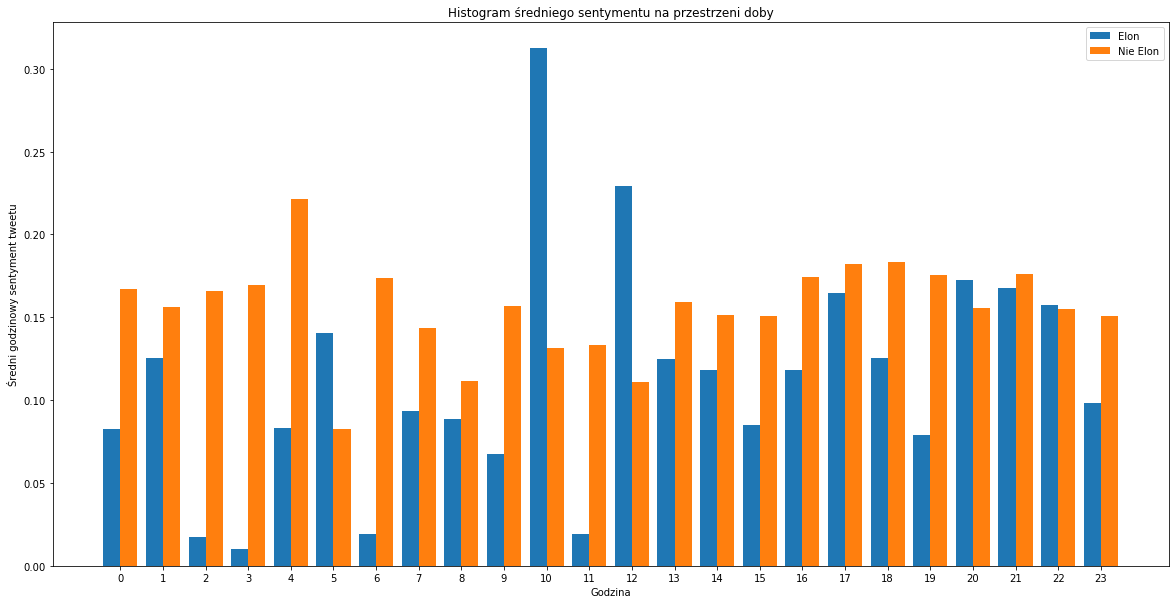

In [75]:
elon_sentiment = data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).describe()['sentiment']['mean']
not_elon_sentiment = data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).describe()['sentiment']['mean']

data_count_by_hour = fill_missing_hours_with_zero(not_elon_sentiment.to_dict())
plot_histogram_of_tweet_during_time(elon_sentiment, data_count_by_hour, 'Średni godzinowy sentyment tweetu', 'Histogram średniego sentymentu na przestrzeni doby')


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


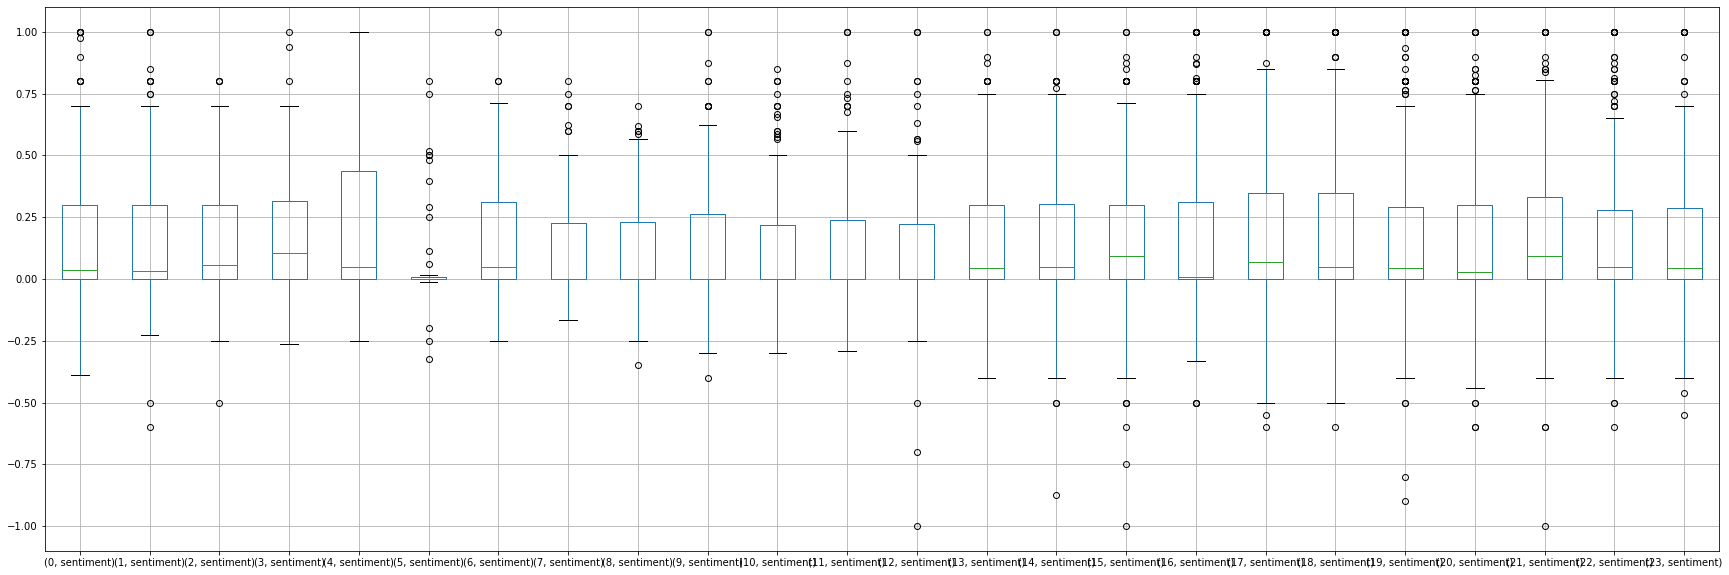

In [76]:
data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).boxplot(column='sentiment', subplots=False, figsize=(30,10))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


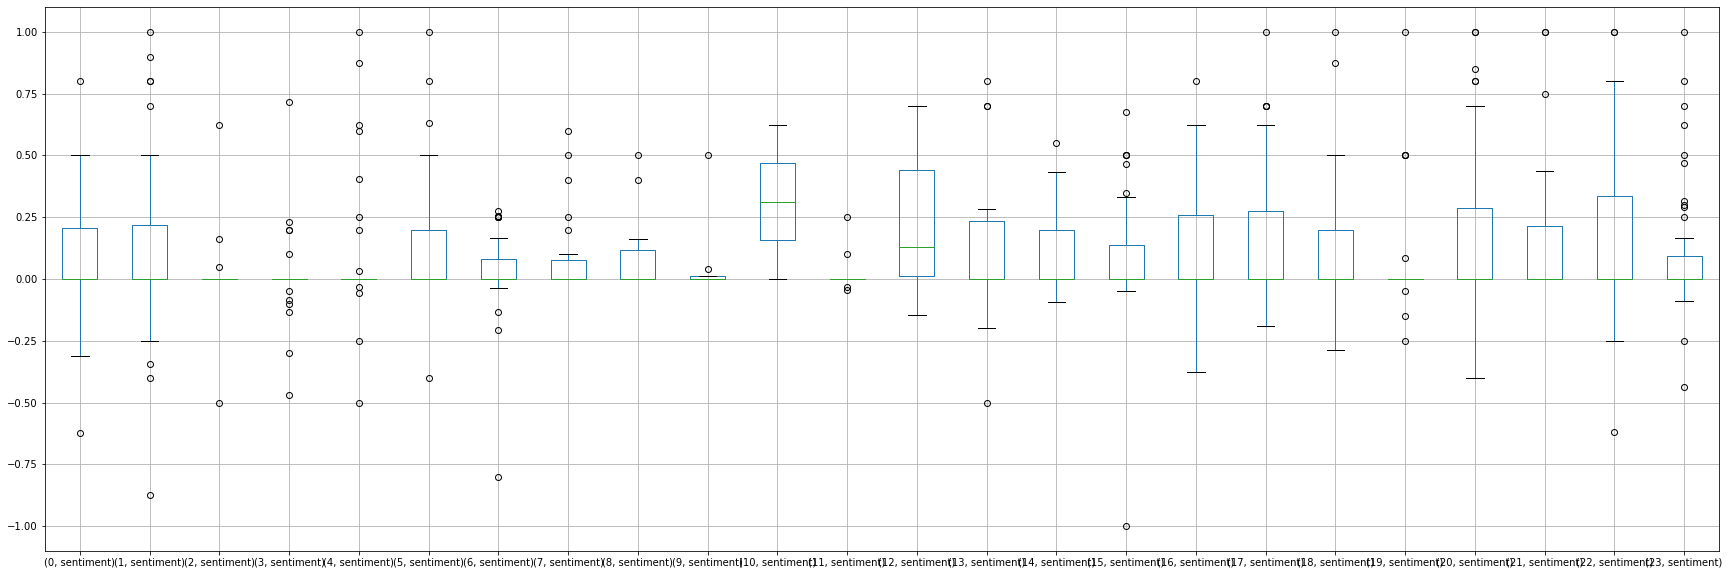

In [77]:
data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).boxplot(column='sentiment', subplots=False, figsize=(30,10))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


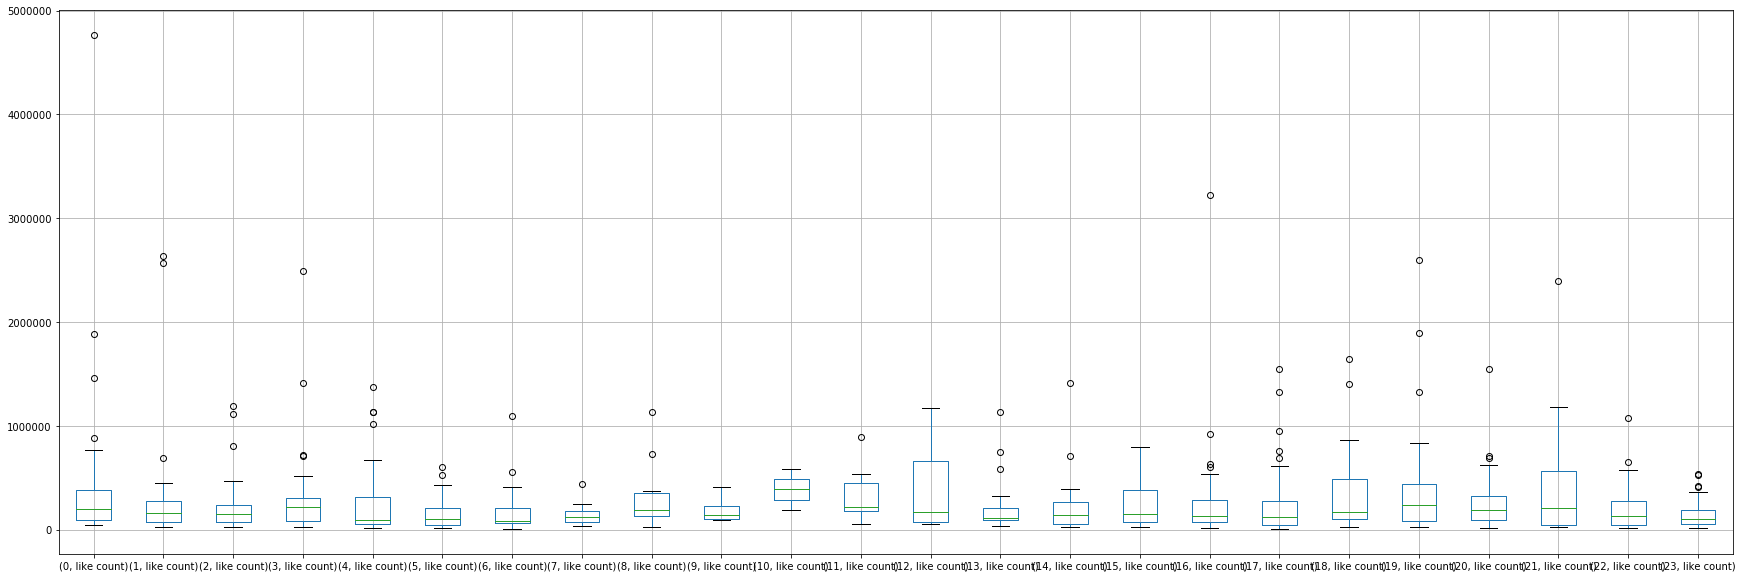

In [78]:
data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).boxplot(column='like count', subplots=False, figsize=(30,10))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


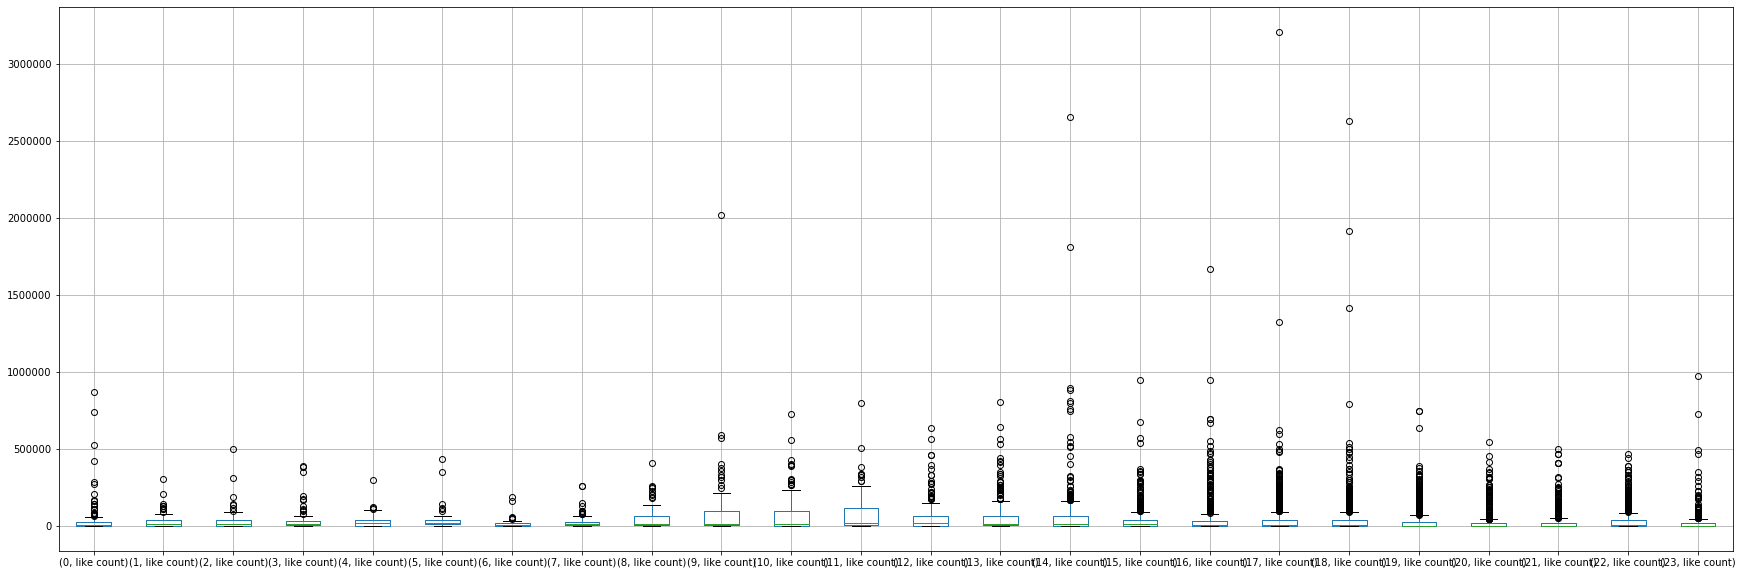

In [79]:
data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).boxplot(column='like count', subplots=False, figsize=(30,10))

In [80]:
df = data_frame_elon.loc[data_frame_elon['lang'] != 'en']
# df = df[~df['text'].isna()]
df

,is Elon Musk,created at,text,source,possibly sensitive,lang,sentiment,retweet count,reply count,like count,quote count
951,True,2022-11-14 20:32:17+00:00,Sìì!,Twitter for iPhone,False,qst,0.0,2976,5916,45637,348
957,True,2022-11-12 07:36:39+00:00,🪦🤖,Twitter for iPhone,False,art,0.0,29050,32779,445114,7771
972,True,2022-11-10 16:41:54+00:00,NaN,Twitter for iPhone,False,zxx,0.0,19868,20055,322955,2489
977,True,2022-11-08 01:28:07+00:00,NaN,Twitter for iPhone,False,zxx,0.0,48966,47335,691082,9641
998,True,2022-11-05 17:26:42+00:00,NaN,Twitter for iPhone,False,zxx,0.0,12963,9029,152461,1335
...,...,...,...,...,...,...,...,...,...,...,...
1634,True,2022-04-03 01:52:31+00:00,NaN,Twitter for iPhone,False,zxx,0.0,22736,9597,240175,3217
1635,True,2022-04-03 01:24:12+00:00,NaN,Twitter for iPhone,False,zxx,0.0,7732,3809,137418,423
1641,True,2022-03-28 08:56:42+00:00,NaN,Twitter for iPhone,False,zxx,0.0,25364,10579,376345,2394
1646,True,2022-03-26 05:53:24+00:00,NaN,Twitter for iPhone,False,zxx,0.0,11871,9796,162002,901


In [81]:
len(df.index) / len(data_frame_elon.index)

0.16407355021216408

In [82]:
df2 = data_frame_not_elon.loc[data_frame_not_elon['lang'] != 'en']
# df2 = df2[~df2['text'].isna()]
df2

,is Elon Musk,created at,text,source,possibly sensitive,lang,sentiment,retweet count,reply count,like count,quote count
0,False,2022-09-07 01:14:34+00:00,NaN,Twitter Web App,False,zxx,0.0,20161,12246,128558,5670
5,False,2021-12-14 00:14:59+00:00,NaN,Twitter Web App,False,zxx,0.0,7250,2187,60368,688
6,False,2021-12-13 17:36:05+00:00,NaN,Twitter Web App,False,zxx,0.0,2289,547,17594,45
8,False,2021-12-13 17:33:30+00:00,📷: @RoryKramer,Twitter Web App,False,und,0.0,2463,393,17574,59
9,False,2021-12-13 17:33:29+00:00,📷: @RoryKramer,Twitter Web App,False,und,0.0,4954,746,34323,313
...,...,...,...,...,...,...,...,...,...,...,...
6820,False,2022-03-25 23:25:36+00:00,"Leslie, meet Leslie. @LesDoggg @TheLeslieJordan",Twitter Media Studio,False,nl,0.0,59,44,740,4
6890,False,2022-02-28 20:37:31+00:00,HOW?! @matfranco,Twitter Media Studio,False,und,0.0,95,47,562,10
6906,False,2022-02-20 17:00:02+00:00,"Happy birthday, mama Riri! @Rihanna",Twitter Media Studio,False,tl,1.0,262,132,2482,16
7016,False,2022-01-17 17:24:22+00:00,#MLKDay❤️,Twitter Web App,False,und,0.0,637,206,6059,37


In [83]:
len(df2.index) / len(data_frame_not_elon.index)

0.11546071226681741

In [84]:
print(data_frame_elon['source'].value_counts())
print(data_frame_not_elon['source'].value_counts())

Twitter for iPhone    707
Name: source, dtype: int64
Twitter Web App             1997
Twitter for iPhone          1552
Twitter Media Studio        1304
SocialFlow                   805
Sprout Social                648
Sprinklr                     581
Twitter Web Client           164
swonkie                       12
Twitter for Advertisers.       4
TweetDeck                      3
Twitter Ads                    2
Twitter for  iPhone            1
Twitter for Android            1
Periscope                      1
Instagram                      1
Name: source, dtype: int64


In [85]:
print(data_frame_elon['possibly sensitive'].value_counts())
print(data_frame_not_elon['possibly sensitive'].value_counts())

False    707
Name: possibly sensitive, dtype: int64
False    7074
True        2
Name: possibly sensitive, dtype: int64


In [86]:
data_frame_annotations = get_data("user_data/annotations*.csv")
data_frame_annotations["created at"] = pd.to_datetime(data_frame["created at"])

data_frame_annotations_elon = data_frame_annotations.loc[data_frame_annotations['is Elon Musk'] == True] 
data_frame_annotations_not_elon = data_frame_annotations.loc[data_frame_annotations['is Elon Musk'] == False] 

In [87]:
print(data_frame_annotations_elon['context annotations domain 0'].value_counts())
print('\n\n')
print(data_frame_annotations_elon['context annotations entity 0'].value_counts())

print('\n\n\n')

print(data_frame_annotations_not_elon['context annotations domain 0'].value_counts())
print('\n\n')
print(data_frame_annotations_not_elon['context annotations entity 0'].value_counts())


Person                            370
Business Taxonomy                 238
Entities [Entity Service]          26
Unified Twitter Taxonomy           21
Video Game                         12
Interests and Hobbies               7
Events [Entity Service]             6
Brand                               6
TV Shows                            5
Brand Vertical                      5
Interests and Hobbies Category      2
Ongoing News Story                  2
Multimedia Franchise                1
Podcast                             1
Interests and Hobbies Vertical      1
Movie                               1
Political Body                      1
Cities                              1
Name: context annotations domain 0, dtype: int64



Elon Musk                                                       364
Financial Services Business                                     230
Aerospace                                                        17
Starlink: Battle for Atlas                                  

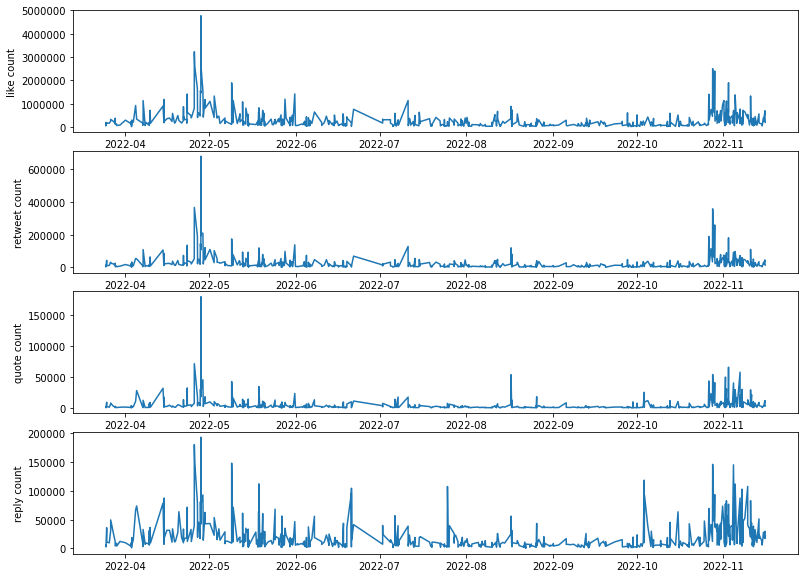

In [88]:
ylabels = ["like count","retweet count", 'quote count', 'reply count']

def plot_charts(data_frame, ylabels):
    fig = plt.figure(figsize=(13,10))
    fig.subplots_adjust(hspace=0.15,wspace=0.01)

    n_row = len(ylabels)
    n_col = 1
    for count, ylabel in enumerate(ylabels):
        ax = fig.add_subplot(n_row, n_col, count+1)
        ax.plot(data_frame["created at"].to_numpy(dtype='datetime64'), data_frame[ylabel].to_numpy())
        ax.set_ylabel(ylabel)

plot_charts(data_frame_elon, ylabels)